In [8]:
!pip install nltk spacy gensim xgboost
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 62.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
  Atte

In [10]:
from google.colab import files
uploaded = files.upload()  # Upload your `archive.zip`

import zipfile
import os

with zipfile.ZipFile("archive (1).zip", "r") as zip_ref:
    zip_ref.extractall("data")  # Extract all to /data folder


Saving archive (1).zip to archive (1) (1).zip


In [1]:

import numpy as np
import pandas as pd


In [2]:
# Label mapping based on filenames
category_map = {
    "business_data.csv": "Business",
    "education_data.csv": "Education",
    "entertainment_data.csv": "Entertainment",
    "sports_data.csv": "Sports",
    "technology_data.csv": "Technology"
}

# Load and label all datasets
dfs = []
for fname, label in category_map.items():
    df = pd.read_csv(f"data/{fname}")
    df["Category"] = label
    dfs.append(df)

# Combine into one DataFrame
df = pd.concat(dfs, ignore_index=True)
df.head()


,headlines,description,content,url,category,Category
0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",https://indianexpress.com/article/business/bud...,business,Business
1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,https://indianexpress.com/article/business/avi...,business,Business
2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business,Business
3,Red Sea woes: Exporters seek increased credit ...,Rising attacks forced shippers to consider the...,Indian exporters have asked the central govern...,https://indianexpress.com/article/business/red...,business,Business
4,Air India group to induct a plane every 6 days...,"Apart from fleet expansion, 2024 will also see...",The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business,Business


In [3]:
!pip install nltk spacy xgboost
!python -m spacy download en_core_web_sm

import re
import nltk
import spacy
import string
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

nlp = spacy.load("en_core_web_sm")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 68.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [11]:
import re
import spacy
from nltk.corpus import stopwords

nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))

# Fill missing text, combine columns
df['combined_text'] = df['headlines'].fillna('') + ' ' + df['description'].fillna('') + ' ' + df['content'].fillna('')


def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and token.is_alpha]
    return ' '.join(tokens)

df['cleaned_text'] = df['combined_text'].apply(preprocess)
df[['cleaned_text', 'Category']].head()


,cleaned_text,Category
0,nirmala sitharaman equal morarji desais record...,Business
1,densify network want least city pair air india...,Business
2,air india group induct aircraft every six day ...,Business
3,red sea woes exporter seek increase credit fre...,Business
4,air india group induct plane every day through...,Business


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['Category']



In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.98
               precision    recall  f1-score   support

     Business       0.97      0.96      0.97       400
    Education       1.00      0.98      0.99       400
Entertainment       0.99      0.99      0.99       400
       Sports       0.99      0.99      0.99       400
   Technology       0.95      0.97      0.96       400

     accuracy                           0.98      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.98      0.98      0.98      2000



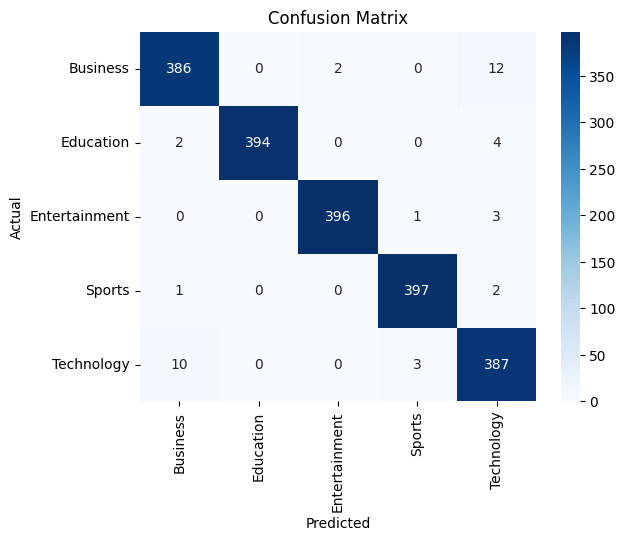

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [17]:
import joblib

joblib.dump(model, "topic_classifier.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']